In [16]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import matplotlib.pyplot as plt


In [17]:
import pandas as pd
import os as os
import numpy as np
import requests
import zipfile
import io

# URL of the data.zip file in the Github repository
url = "https://github.com/BhavikMore7/Assignment1/raw/main/data.zip"

# Download the zip file and extract it
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

path = "data"

def read_text_file(file_path):
    with open(file_path, 'r') as f:
        with open("outputnew.csv", "a") as f1 ,open("inputnew.csv", "a") as f2:
            for i, line in enumerate(f):
                if i == 0 :
                    f1.write(line) 
                elif i == 6:
                    f2.write(line) 
                elif i > 6:
                    break

for file in os.listdir(path):
    if file.endswith(".poscar"):
        file_path = os.path.join(path, file)
        read_text_file(file_path)


In [18]:
import pandas as pd
import os

path = "data"

# Read outputnew.txt file into a pandas DataFrame
#output_file = os.path.join(path, "outputnew.txt")
df = pd.read_csv('outputnew.txt', header=None)


In [19]:

first_column = df.iloc[:, 0]
first_column
targets=first_column.str.split("\s+",7, expand=True).iloc[:,1:6]
targets
targets.columns=['atEnergy (eV)','egap (eV)','eps_elec','eps_ion','eps_tot']
targets

,atEnergy (eV),egap (eV),eps_elec,eps_ion,eps_tot
0,6.8487278E+00,2.1574000E+00,3.5401200E+00,1.2628000E+00,4.8029200E+00
1,6.9856869E+00,3.3007000E+00,3.2620700E+00,2.4738900E-01,3.5094590E+00
2,6.1088838E+00,4.2319000E+00,2.7747000E+00,5.6958000E-02,2.8316580E+00
3,7.1643052E+00,3.1541000E+00,3.0973000E+00,7.2370800E-01,3.8210080E+00
4,6.6684790E+00,2.0905000E+00,3.6695900E+00,8.7635200E-01,4.5459420E+00
...,...,...,...,...,...
640,5.9731898E+00,5.3671000E+00,2.7034800E+00,6.4539500E-01,3.3488750E+00
641,6.0916841E+00,4.0481000E+00,2.7035200E+00,9.8403400E-01,3.6875540E+00
642,6.3469694E+00,5.0059000E+00,2.7333900E+00,8.9722300E-01,3.6306130E+00
643,6.3021636E+00,3.0654000E+00,2.8129000E+00,4.6262100E-01,3.2755210E+00


In [20]:

targets=targets.astype(np.float64)
targets
y=targets.iloc[:,0].values
# y.shape
y

array([6.8487278, 6.9856869, 6.1088838, 7.1643052, 6.668479 , 6.3022356,
       6.4485672, 6.1795803, 6.9276731, 6.0987466, 6.5727474, 6.3490594,
       7.2851352, 6.4142561, 7.0892293, 6.6541458, 6.3014994, 6.1483299,
       6.9409502, 5.8089067, 6.4422913, 5.8173882, 6.6727329, 6.6438923,
       6.2801052, 6.826573 , 6.8070163, 6.2001278, 6.231857 , 5.9085065,
       6.2421134, 6.6233622, 6.6891421, 6.013759 , 6.2284793, 6.5772081,
       5.5699872, 6.584506 , 6.2617983, 7.0060929, 6.1967654, 5.8779783,
       6.66293  , 6.8046902, 5.7852155, 6.3644768, 6.4701961, 5.8903584,
       6.6417978, 6.8602613, 6.6720965, 6.1002973, 6.4643872, 6.9522231,
       6.3644768, 5.8528694, 6.9729246, 6.4334275, 6.5969615, 7.1047184,
       6.2000653, 6.3333511, 6.3752237, 6.3183744, 6.470287 , 6.7750284,
       6.6075796, 5.7852155, 6.2076334, 6.6742804, 6.7631028, 6.7608237,
       6.1656946, 5.8013882, 5.8271033, 6.6679982, 6.8487278, 6.6748429,
       6.2262445, 6.1656946, 6.1143078, 6.1669404, 

In [21]:
inputs=pd.read_csv(r'inputnew.txt',header=None,sep='\s+')
inputs

,0,1,2
0,16,14,10.0
1,26,20,2.0
2,28,44,NaN
3,14,8,6.0
4,20,20,6.0
...,...,...,...
640,16,28,10.0
641,14,24,12.0
642,8,12,8.0
643,18,24,6.0


In [22]:
inputs.columns = ['Carbon','Hydrogen','Oxygen']
inputs.head()


,Carbon,Hydrogen,Oxygen
0,16,14,10.0
1,26,20,2.0
2,28,44,NaN
3,14,8,6.0
4,20,20,6.0


In [23]:
inputs=inputs.fillna(0)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(inputs)

,Carbon,Hydrogen,Oxygen
0,16,14,10.0
1,26,20,2.0
2,28,44,0.0
3,14,8,6.0
4,20,20,6.0
5,21,28,3.0
6,20,24,6.0
7,18,28,6.0
8,20,16,4.0
9,20,32,8.0


In [25]:
x=inputs.iloc[:,:].values
x

array([[16., 14., 10.],
       [26., 20.,  2.],
       [28., 44.,  0.],
       ...,
       [ 8., 12.,  8.],
       [18., 24.,  6.],
       [18., 24.,  6.]])

In [26]:
for i in range(0,x.shape[0]) :
    for j in range(1):
        sum = x[i,j]+x[i,j+1]+x[i,j+2]
        x[i,j]=x[i,j]/sum
        x[i,j+1]=x[i,j+1]/sum
        x[i,j+2]=x[i,j+1]/sum
        

        sum = 0

In [27]:
x
type(x)

numpy.ndarray

In [28]:
train_x, test_x, train_y, test_y =train_test_split(x,y, test_size = 0.2, random_state = 42)
# train_x
# test_x
# train_y 
# test_y 


In [29]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))

In [30]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error','mean_absolute_error'])

In [31]:
history = ann.fit(train_x, train_y, batch_size=5, epochs=600, validation_split = 0.2, shuffle=True, verbose=2)

Epoch 1/600
83/83 - 2s - loss: 16.6158 - mean_squared_error: 16.6158 - mean_absolute_error: 3.4443 - val_loss: 0.5305 - val_mean_squared_error: 0.5305 - val_mean_absolute_error: 0.5899 - 2s/epoch - 19ms/step
Epoch 2/600
83/83 - 0s - loss: 0.6009 - mean_squared_error: 0.6009 - mean_absolute_error: 0.6234 - val_loss: 0.3333 - val_mean_squared_error: 0.3333 - val_mean_absolute_error: 0.4723 - 194ms/epoch - 2ms/step
Epoch 3/600
83/83 - 0s - loss: 0.4648 - mean_squared_error: 0.4648 - mean_absolute_error: 0.5340 - val_loss: 0.1198 - val_mean_squared_error: 0.1198 - val_mean_absolute_error: 0.2601 - 201ms/epoch - 2ms/step
Epoch 4/600
83/83 - 0s - loss: 0.3548 - mean_squared_error: 0.3548 - mean_absolute_error: 0.4778 - val_loss: 0.1016 - val_mean_squared_error: 0.1016 - val_mean_absolute_error: 0.2434 - 204ms/epoch - 2ms/step
Epoch 5/600
83/83 - 0s - loss: 0.3818 - mean_squared_error: 0.3818 - mean_absolute_error: 0.4963 - val_loss: 0.0894 - val_mean_squared_error: 0.0894 - val_mean_absolute

In [32]:
predictions = ann.predict(x=test_x, batch_size=10)
r_squared = r2_score(test_y, predictions)
print('R squared value on   test  data is', r_squared)

13/13 [==============================] - 0s 2ms/step
R squared value on   test  data is 0.9851363347920384


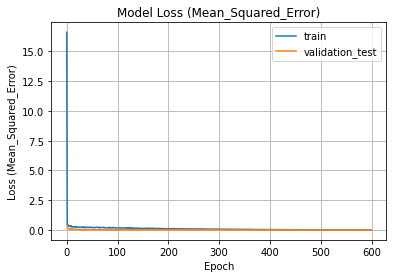

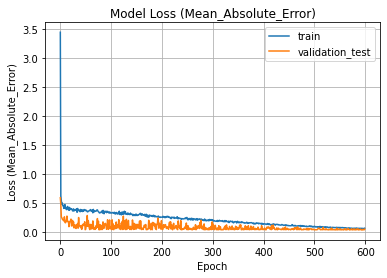

In [33]:
#For mean squared error vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Squared_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Squared_Error)')
plt.show()

#For mean absolute error vs epoch
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Absolute_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Absolute_Error)')
plt.show()

In [34]:
predictions_on_trained_data = ann.predict(x=train_x, batch_size=10)

52/52 [==============================] - 0s 1ms/step


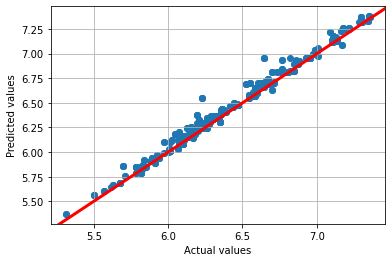

In [35]:
plt.scatter(train_y, predictions_on_trained_data)
#plt.plot([2.5, 3.5, 4.5, 6,10], [2.5, 3.5, 4.5, 6,10], 'r') # y=x line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

In [36]:
predictions = ann.predict(x=test_x, batch_size=10)

13/13 [==============================] - 0s 2ms/step


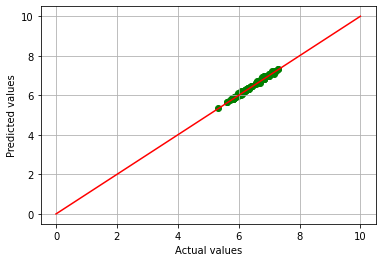

In [37]:
plt.scatter(test_y, predictions,color='green')
plt.plot([0,2.5, 3.5, 4.5, 6,10], [0,2.5, 3.5, 4.5, 6,10], 'r') # y=x line

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

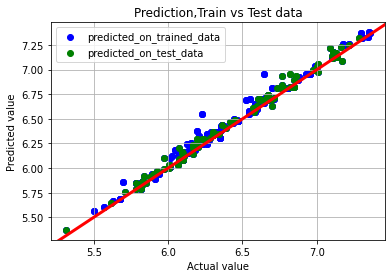

R squared value on trained data is 0.9796956868992893
R squared value on   test  data is 0.9851363347920384


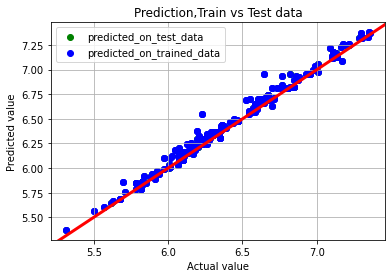

In [38]:
#Highlighting predictions on test data(green dots)
plt.scatter(train_y, predictions_on_trained_data, color='b')
plt.scatter(test_y, predictions, color='g')
plt.legend(['predicted_on_trained_data' , 'predicted_on_test_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

#R_Squared Values
r_squared = r2_score(train_y, predictions_on_trained_data)
print('R squared value on trained data is', r_squared)
r_squared = r2_score(test_y, predictions)
print('R squared value on   test  data is', r_squared)


#Highlighting predictions on trained data(blue dots)
plt.scatter(test_y, predictions, color='g')
plt.scatter(train_y, predictions_on_trained_data, color='b')
plt.legend(['predicted_on_test_data' , 'predicted_on_trained_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

egap (ev)

In [39]:
y1=targets.iloc[:,1].values
# y.shape
y1

array([2.1574, 3.3007, 4.2319, 3.1541, 2.0905, 3.092 , 3.4954, 3.6023,
       2.8196, 4.0514, 3.0643, 3.0016, 2.6433, 2.1972, 1.5332, 2.4759,
       2.5932, 4.892 , 3.9727, 6.3226, 4.8239, 6.8401, 2.0769, 3.0262,
       3.4128, 2.6618, 2.2842, 3.7776, 2.9988, 4.964 , 3.3073, 1.426 ,
       3.1319, 4.7847, 4.7651, 3.709 , 7.4285, 2.0696, 3.653 , 2.9033,
       4.0867, 6.6753, 2.761 , 2.5896, 6.0956, 1.9088, 4.3716, 6.9172,
       3.7705, 2.7701, 3.3044, 5.0825, 3.2108, 2.6445, 1.9088, 5.6077,
       3.4755, 3.7676, 2.8926, 2.9555, 3.1341, 3.3071, 3.4519, 3.0642,
       4.3725, 2.9036, 1.436 , 6.0956, 4.6711, 3.1968, 2.9308, 1.3219,
       3.0564, 6.9045, 5.6675, 1.945 , 2.1574, 3.1933, 5.6761, 3.0564,
       3.6251, 4.1204, 4.898 , 2.5463, 3.798 , 1.3028, 5.0659, 5.1049,
       1.791 , 6.8918, 5.6147, 3.8031, 2.6205, 4.1446, 4.0816, 5.6127,
       4.6223, 2.735 , 3.1776, 4.918 , 5.9081, 6.6832, 1.1862, 5.0062,
       5.0761, 3.709 , 2.7117, 2.1537, 2.293 , 2.1588, 2.9361, 3.6902,
      

In [40]:
train_x, test_x, train_y1, test_y1 =train_test_split(x,y1, test_size = 0.2, random_state = 42)

In [41]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [42]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error','mean_absolute_error'])

In [ ]:
history = ann.fit(train_x, train_y1, batch_size=7, epochs=400, validation_split = 0.2, shuffle=True, verbose=2)

Epoch 1/400
59/59 - 2s - loss: 7.3799 - mean_squared_error: 7.3799 - mean_absolute_error: 2.2080 - val_loss: 2.2622 - val_mean_squared_error: 2.2622 - val_mean_absolute_error: 1.1672 - 2s/epoch - 37ms/step
Epoch 2/400
59/59 - 0s - loss: 1.8139 - mean_squared_error: 1.8139 - mean_absolute_error: 1.1029 - val_loss: 1.2414 - val_mean_squared_error: 1.2414 - val_mean_absolute_error: 0.9139 - 293ms/epoch - 5ms/step
Epoch 3/400
59/59 - 0s - loss: 1.2017 - mean_squared_error: 1.2017 - mean_absolute_error: 0.8791 - val_loss: 0.8957 - val_mean_squared_error: 0.8957 - val_mean_absolute_error: 0.8024 - 298ms/epoch - 5ms/step
Epoch 4/400
59/59 - 0s - loss: 0.9913 - mean_squared_error: 0.9913 - mean_absolute_error: 0.7883 - val_loss: 0.8678 - val_mean_squared_error: 0.8678 - val_mean_absolute_error: 0.7825 - 269ms/epoch - 5ms/step
Epoch 5/400
59/59 - 0s - loss: 0.9230 - mean_squared_error: 0.9230 - mean_absolute_error: 0.7496 - val_loss: 0.7612 - val_mean_squared_error: 0.7612 - val_mean_absolute_e

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)
r_squared = r2_score(test_y1, predictions)
print('R squared value on   test  data is', r_squared)


5/5 [==============================] - 0s 2ms/step
R squared value on   test  data is 0.8005543211611194


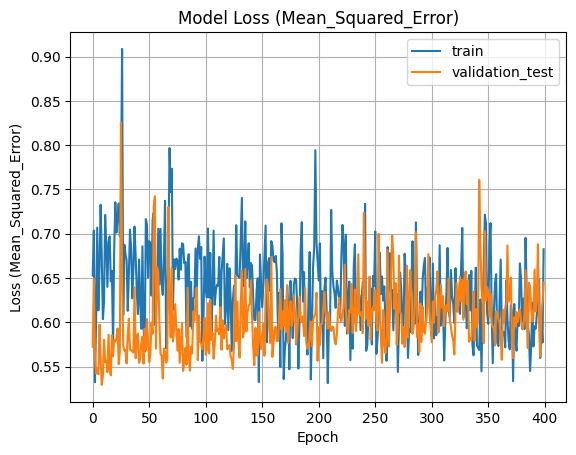

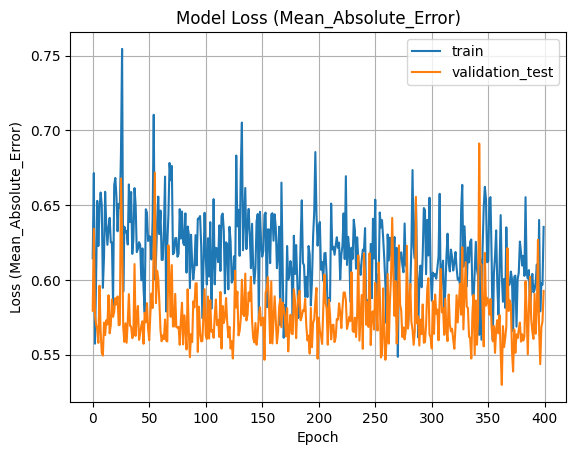

In [ ]:
#For mean squared error vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Squared_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Squared_Error)')
plt.show()

#For mean absolute error vs epoch
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Absolute_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Absolute_Error)')
plt.show()

In [ ]:
predictions_on_trained_data = ann.predict(x=train_x, batch_size=10)

18/18 [==============================] - 0s 762us/step


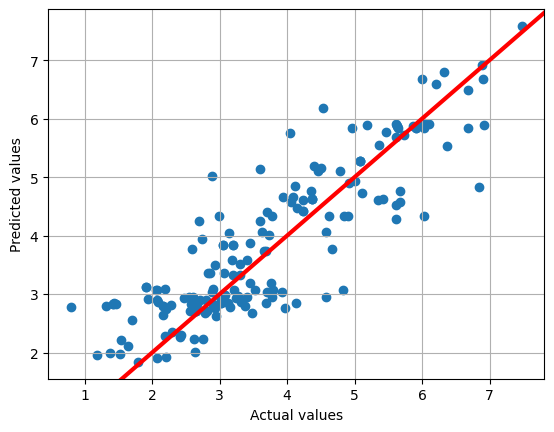

In [ ]:
plt.scatter(train_y1, predictions_on_trained_data)
#plt.plot([2.5, 3.5, 4.5, 6,10], [2.5, 3.5, 4.5, 6,10], 'r') # y=x line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)

5/5 [==============================] - 0s 1ms/step


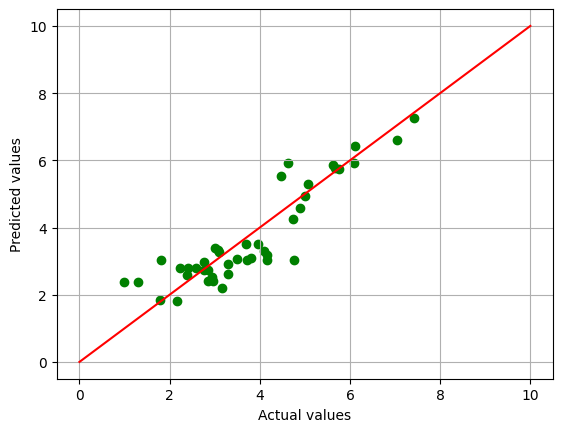

In [ ]:
plt.scatter(test_y1, predictions,color='green')
plt.plot([0,2.5, 3.5, 4.5, 6,10], [0,2.5, 3.5, 4.5, 6,10], 'r') # y=x line

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

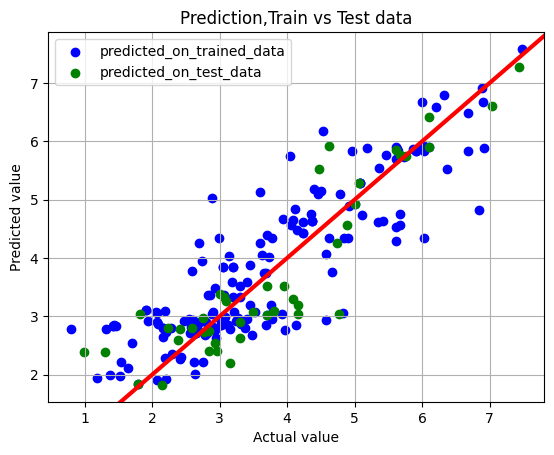

R squared value on trained data is 0.7490489893730508
R squared value on   test  data is 0.8005543211611194


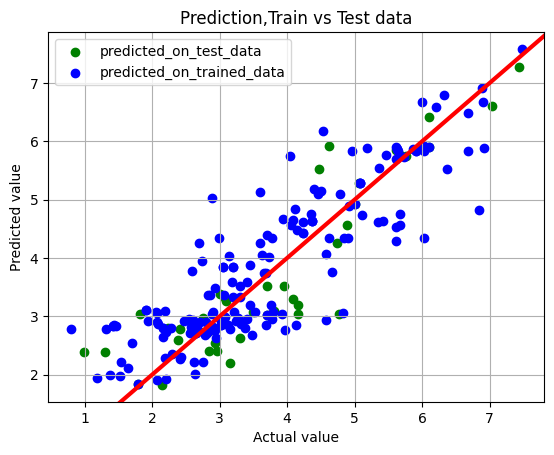

In [ ]:
#Highlighting predictions on test data(green dots)
plt.scatter(train_y1, predictions_on_trained_data, color='b')
plt.scatter(test_y1, predictions, color='g')
plt.legend(['predicted_on_trained_data' , 'predicted_on_test_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

#R_Squared Values
r_squared = r2_score(train_y1, predictions_on_trained_data)
print('R squared value on trained data is', r_squared)
r_squared = r2_score(test_y1, predictions)
print('R squared value on   test  data is', r_squared)


#Highlighting predictions on trained data(blue dots)
plt.scatter(test_y1, predictions, color='g')
plt.scatter(train_y1, predictions_on_trained_data, color='b')
plt.legend(['predicted_on_test_data' , 'predicted_on_trained_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

eps_elec 

In [ ]:
y2=targets.iloc[:,2].values
# y.shape
y2

array([2.73933, 2.70082, 2.69101, 3.60155, 3.20358, 2.72567, 3.64032,
       2.78478, 2.64289, 3.40138, 3.25441, 2.69797, 2.69394, 3.03519,
       4.9922 , 2.85544, 3.23976, 2.7047 , 3.01387, 3.06411, 2.70352,
       3.3943 , 2.73443, 2.74252, 2.90843, 2.66436, 2.54306, 2.66382,
       2.94456, 2.90922, 3.30147, 3.03637, 2.70386, 3.06016, 2.6254 ,
       3.18445, 2.75448, 2.753  , 2.85324, 2.92817, 3.3505 , 3.01966,
       2.66474, 2.64256, 2.63962, 2.89913, 2.65743, 3.54012, 3.3486 ,
       3.86189, 2.92817, 3.3505 , 3.23858, 2.66474, 2.64256, 2.63962,
       2.89913, 2.65743, 3.54012, 3.3486 , 3.86189, 2.70747, 3.98237,
       3.04066, 2.56685, 2.83665, 3.07474, 2.89957, 3.44831, 2.93364,
       3.08582, 2.91339, 2.40577, 2.73339, 2.66254, 2.69563, 3.66959,
       3.10779, 2.73367, 2.79245, 2.66359, 2.9133 , 2.66296, 3.62187,
       3.48401, 3.40137, 2.97846, 2.67172, 2.72099, 3.07435, 2.68135,
       2.8319 , 2.9563 , 2.74309, 2.8162 , 4.12657, 2.56307, 3.8238 ,
       2.84837, 2.52

In [ ]:
train_x, test_x, train_y2, test_y2 =train_test_split(x,y2, test_size = 0.2, random_state = 42)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error','mean_absolute_error'])

In [ ]:
history = ann.fit(train_x, train_y2, batch_size=7, epochs=500, validation_split = 0.2, shuffle=True, verbose=2)

Epoch 1/500
20/20 - 3s - loss: 7.4936 - mean_squared_error: 7.4936 - mean_absolute_error: 2.7091 - val_loss: 5.3413 - val_mean_squared_error: 5.3413 - val_mean_absolute_error: 2.2579 - 3s/epoch - 137ms/step
Epoch 2/500
20/20 - 0s - loss: 1.8813 - mean_squared_error: 1.8813 - mean_absolute_error: 1.1704 - val_loss: 0.5099 - val_mean_squared_error: 0.5099 - val_mean_absolute_error: 0.6003 - 103ms/epoch - 5ms/step
Epoch 3/500
20/20 - 0s - loss: 0.4248 - mean_squared_error: 0.4248 - mean_absolute_error: 0.5223 - val_loss: 0.3805 - val_mean_squared_error: 0.3805 - val_mean_absolute_error: 0.4297 - 109ms/epoch - 5ms/step
Epoch 4/500
20/20 - 0s - loss: 0.3133 - mean_squared_error: 0.3133 - mean_absolute_error: 0.4233 - val_loss: 0.2404 - val_mean_squared_error: 0.2404 - val_mean_absolute_error: 0.3543 - 120ms/epoch - 6ms/step
Epoch 5/500
20/20 - 0s - loss: 0.3105 - mean_squared_error: 0.3105 - mean_absolute_error: 0.4116 - val_loss: 0.2414 - val_mean_squared_error: 0.2414 - val_mean_absolute_

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)
r_squared = r2_score(test_y2, predictions)
print('R squared value on   test  data is', r_squared)

5/5 [==============================] - 0s 2ms/step
R squared value on   test  data is 0.6345681284331293


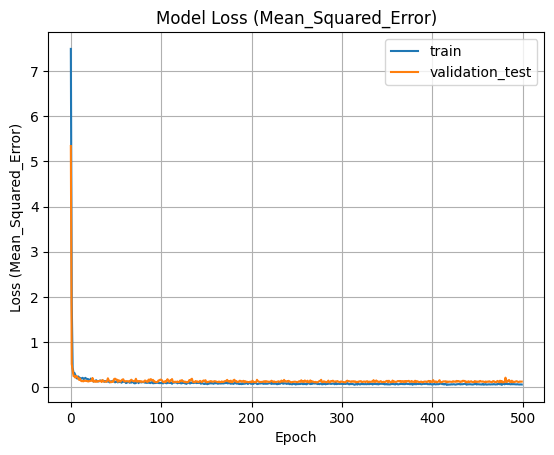

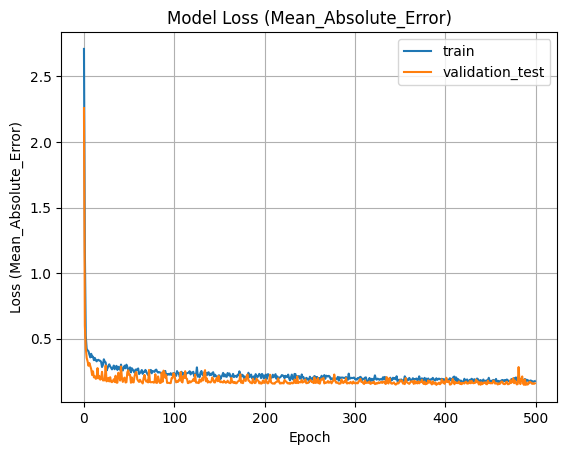

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Squared_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Squared_Error)')
plt.show()

#For mean absolute error vs epoch
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Absolute_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Absolute_Error)')
plt.show()

In [ ]:
predictions_on_trained_data = ann.predict(x=train_x, batch_size=10)

18/18 [==============================] - 0s 2ms/step


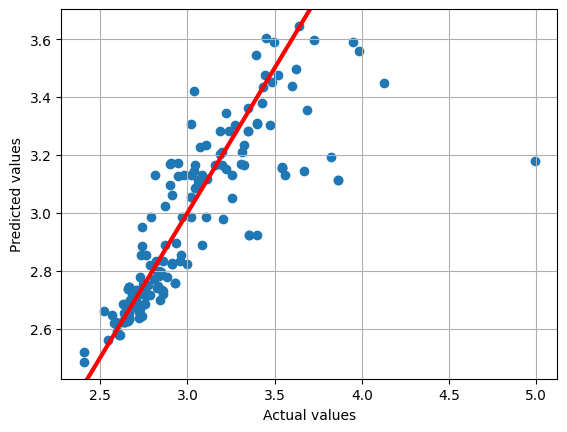

In [ ]:
plt.scatter(train_y2, predictions_on_trained_data)
#plt.plot([2.5, 3.5, 4.5, 6,10], [2.5, 3.5, 4.5, 6,10], 'r') # y=x line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

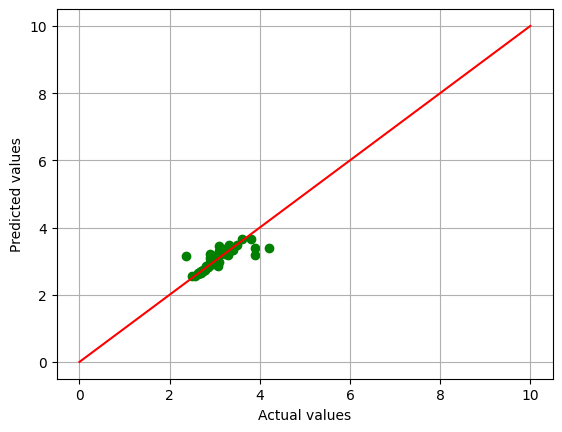

In [ ]:
plt.scatter(test_y2, predictions,color='green')
plt.plot([0,2.5, 3.5, 4.5, 6,10], [0,2.5, 3.5, 4.5, 6,10], 'r') # y=x line

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

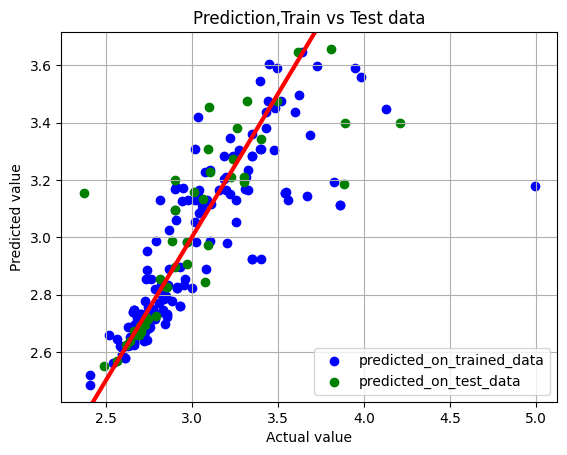

R squared value on trained data is 0.6471396748850784
R squared value on   test  data is 0.6345681284331293


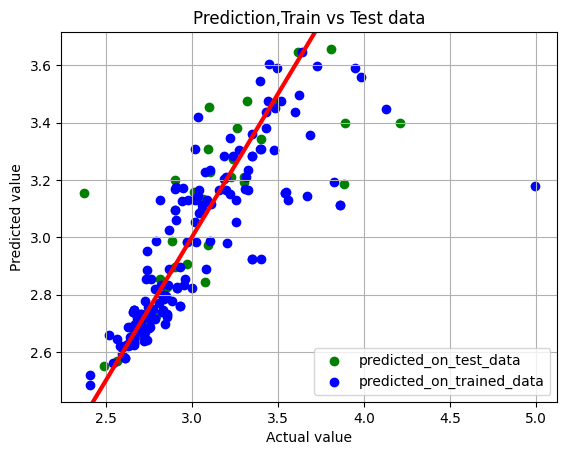

In [ ]:
#Highlighting predictions on test data(green dots)
plt.scatter(train_y2, predictions_on_trained_data, color='b')
plt.scatter(test_y2, predictions, color='g')
plt.legend(['predicted_on_trained_data' , 'predicted_on_test_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

#R_Squared Values
r_squared = r2_score(train_y2, predictions_on_trained_data)
print('R squared value on trained data is', r_squared)
r_squared = r2_score(test_y2, predictions)
print('R squared value on   test  data is', r_squared)


#Highlighting predictions on trained data(blue dots)
plt.scatter(test_y2, predictions, color='g')
plt.scatter(train_y2, predictions_on_trained_data, color='b')
plt.legend(['predicted_on_test_data' , 'predicted_on_trained_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

eps_ion

In [ ]:
y3=targets.iloc[:,3].values
# y.shape
y3

array([0.541445, 0.319518, 0.415106, 0.544332, 1.46424 , 0.206242,
       0.297829, 0.547542, 0.323633, 0.582047, 0.228732, 0.44706 ,
       0.442999, 0.411489, 1.32991 , 0.33565 , 0.450171, 0.554801,
       0.339043, 0.712368, 0.984034, 0.52884 , 0.512183, 0.470767,
       0.611608, 1.38761 , 0.319383, 0.408926, 0.38633 , 0.445096,
       0.417306, 1.24334 , 0.390758, 0.97788 , 1.14929 , 0.412774,
       0.927723, 0.372455, 0.562202, 0.676914, 0.773254, 0.580851,
       1.11245 , 0.839602, 0.266327, 0.405308, 0.685141, 1.2628  ,
       0.390692, 0.823331, 0.676914, 0.773254, 0.634441, 1.11245 ,
       0.839602, 0.266327, 0.405308, 0.685141, 1.2628  , 0.390692,
       0.823331, 0.54523 , 0.609785, 0.754251, 0.398345, 0.256534,
       0.951758, 0.53955 , 0.473474, 0.543595, 2.14168 , 1.26774 ,
       0.762666, 0.897223, 0.945578, 0.36646 , 0.876352, 1.36394 ,
       0.897764, 0.253589, 0.950466, 1.27078 , 0.949231, 0.632104,
       0.426934, 0.771825, 0.546561, 0.760686, 1.02381 , 0.595

In [ ]:
train_x, test_x, train_y3, test_y3 =train_test_split(x,y3, test_size = 0.2, random_state = 42)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))


In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error','mean_absolute_error'])

In [ ]:
history = ann.fit(train_x, train_y3, batch_size=5, epochs=600, validation_split = 0.2, shuffle=True, verbose=2)

Epoch 1/600
28/28 - 3s - loss: 0.2185 - mean_squared_error: 0.2185 - mean_absolute_error: 0.3603 - val_loss: 0.1601 - val_mean_squared_error: 0.1601 - val_mean_absolute_error: 0.3235 - 3s/epoch - 97ms/step
Epoch 2/600
28/28 - 0s - loss: 0.1562 - mean_squared_error: 0.1562 - mean_absolute_error: 0.3010 - val_loss: 0.1528 - val_mean_squared_error: 0.1528 - val_mean_absolute_error: 0.3113 - 146ms/epoch - 5ms/step
Epoch 3/600
28/28 - 0s - loss: 0.1665 - mean_squared_error: 0.1665 - mean_absolute_error: 0.3114 - val_loss: 0.1496 - val_mean_squared_error: 0.1496 - val_mean_absolute_error: 0.3065 - 126ms/epoch - 5ms/step
Epoch 4/600
28/28 - 0s - loss: 0.1641 - mean_squared_error: 0.1641 - mean_absolute_error: 0.3040 - val_loss: 0.1470 - val_mean_squared_error: 0.1470 - val_mean_absolute_error: 0.3050 - 148ms/epoch - 5ms/step
Epoch 5/600
28/28 - 0s - loss: 0.1546 - mean_squared_error: 0.1546 - mean_absolute_error: 0.2961 - val_loss: 0.1447 - val_mean_squared_error: 0.1447 - val_mean_absolute_e

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)
r_squared = r2_score(test_y3, predictions)
print('R squared value on   test  data is', r_squared)


5/5 [==============================] - 0s 2ms/step
R squared value on   test  data is 0.7964043434340746


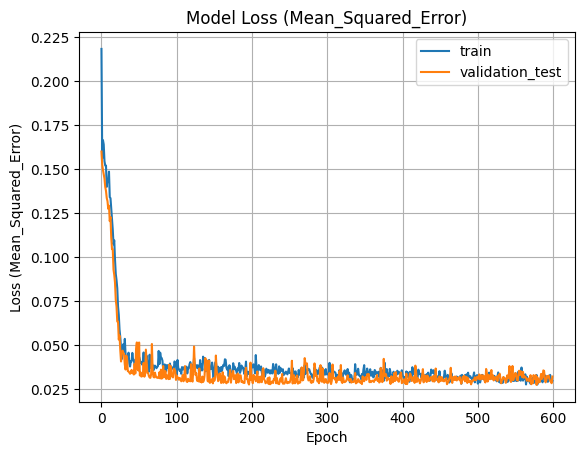

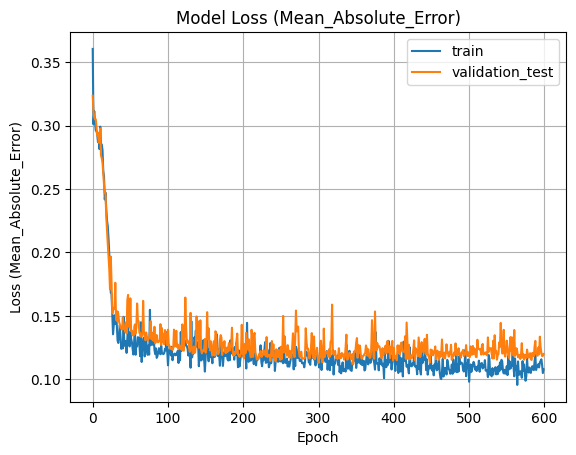

In [ ]:
#For mean squared error vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Squared_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Squared_Error)')
plt.show()

#For mean absolute error vs epoch
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Absolute_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Absolute_Error)')
plt.show()

In [ ]:
predictions_on_trained_data = ann.predict(x=train_x, batch_size=10)

18/18 [==============================] - 0s 3ms/step


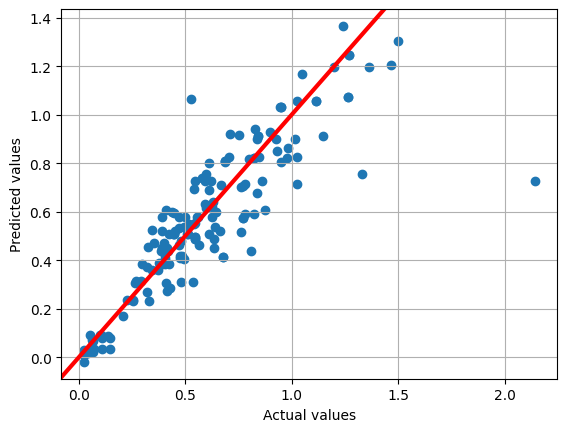

In [ ]:
plt.scatter(train_y3, predictions_on_trained_data)
#plt.plot([2.5, 3.5, 4.5, 6,10], [2.5, 3.5, 4.5, 6,10], 'r') # y=x line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)

5/5 [==============================] - 0s 5ms/step


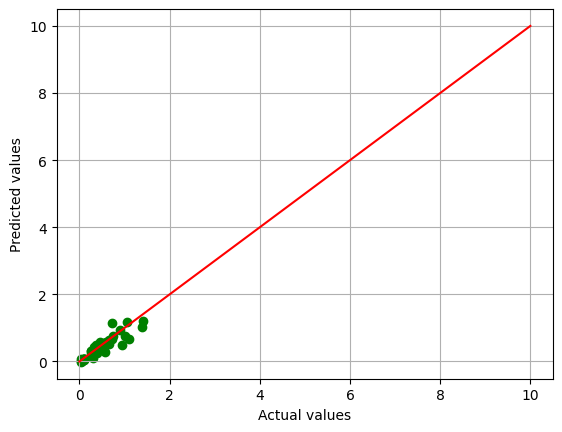

In [ ]:
plt.scatter(test_y3, predictions,color='green')
plt.plot([0,2.5, 3.5, 4.5, 6,10], [0,2.5, 3.5, 4.5, 6,10], 'r') # y=x line

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

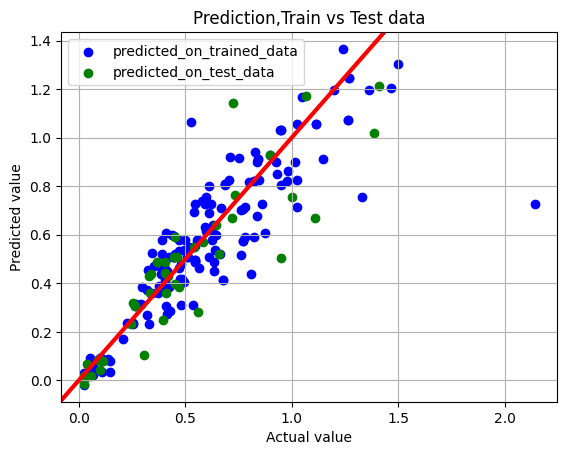

R squared value on trained data is 0.7832492270818874
R squared value on   test  data is 0.7964043434340746


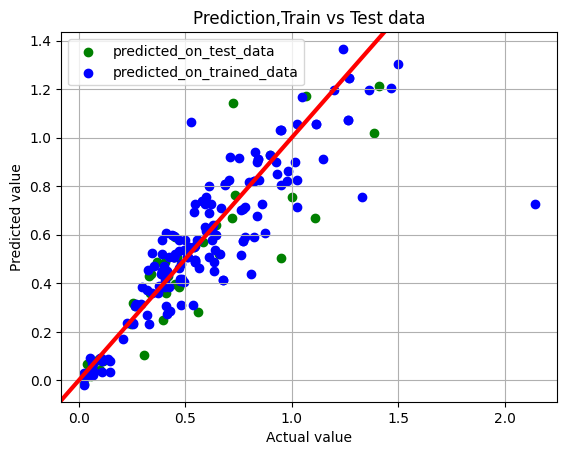

In [ ]:
#Highlighting predictions on test data(green dots)
plt.scatter(train_y3, predictions_on_trained_data, color='b')
plt.scatter(test_y3, predictions, color='g')
plt.legend(['predicted_on_trained_data' , 'predicted_on_test_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

#R_Squared Values
r_squared = r2_score(train_y3, predictions_on_trained_data)
print('R squared value on trained data is', r_squared)
r_squared = r2_score(test_y3, predictions)
print('R squared value on   test  data is', r_squared)


#Highlighting predictions on trained data(blue dots)
plt.scatter(test_y3, predictions, color='g')
plt.scatter(train_y3, predictions_on_trained_data, color='b')
plt.legend(['predicted_on_test_data' , 'predicted_on_trained_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

In [ ]:
y4=targets.iloc[:,4].values
# y.shape
y4

array([3.280775, 3.020338, 3.106116, 4.145882, 4.66782 , 2.931912,
       3.938149, 3.332322, 2.966523, 3.983427, 3.483142, 3.14503 ,
       3.136939, 3.446679, 6.32211 , 3.19109 , 3.689931, 3.259501,
       3.352913, 3.776478, 3.687554, 3.92314 , 3.246613, 3.213287,
       3.520038, 4.05197 , 2.862443, 3.072746, 3.33089 , 3.354316,
       3.718776, 4.27971 , 3.094618, 4.03804 , 3.77469 , 3.597224,
       3.682203, 3.125455, 3.415442, 3.605084, 4.123754, 3.600511,
       3.77719 , 3.482162, 2.905947, 3.304438, 3.342571, 4.80292 ,
       3.739292, 4.685221, 3.605084, 4.123754, 3.873021, 3.77719 ,
       3.482162, 2.905947, 3.304438, 3.342571, 4.80292 , 3.739292,
       4.685221, 3.2527  , 4.592155, 3.794911, 2.965195, 3.093184,
       4.026498, 3.43912 , 3.921784, 3.477235, 5.2275  , 4.18113 ,
       3.168436, 3.630613, 3.608118, 3.06209 , 4.545942, 4.47173 ,
       3.631434, 3.046039, 3.614056, 4.18408 , 3.612191, 4.253974,
       3.910944, 4.173195, 3.525021, 3.432406, 3.7448  , 3.670

In [ ]:
train_x, test_x, train_y4, test_y4 =train_test_split(x,y4, test_size = 0.2, random_state = 42)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

ann.add(tf.keras.layers.Dropout(.2, input_shape=(3,)))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error','mean_absolute_error'])

In [ ]:
history = ann.fit(train_x, train_y4, batch_size=5, epochs=600, validation_split = 0.2, shuffle=True, verbose=2)

Epoch 1/600
28/28 - 2s - loss: 10.4966 - mean_squared_error: 10.4966 - mean_absolute_error: 3.1792 - val_loss: 7.9030 - val_mean_squared_error: 7.9030 - val_mean_absolute_error: 2.7103 - 2s/epoch - 72ms/step
Epoch 2/600
28/28 - 0s - loss: 3.7247 - mean_squared_error: 3.7247 - mean_absolute_error: 1.7320 - val_loss: 1.0612 - val_mean_squared_error: 1.0612 - val_mean_absolute_error: 0.7634 - 170ms/epoch - 6ms/step
Epoch 3/600
28/28 - 0s - loss: 0.7363 - mean_squared_error: 0.7363 - mean_absolute_error: 0.6854 - val_loss: 0.7334 - val_mean_squared_error: 0.7334 - val_mean_absolute_error: 0.6509 - 157ms/epoch - 6ms/step
Epoch 4/600
28/28 - 0s - loss: 0.5782 - mean_squared_error: 0.5782 - mean_absolute_error: 0.6026 - val_loss: 0.7304 - val_mean_squared_error: 0.7304 - val_mean_absolute_error: 0.6391 - 116ms/epoch - 4ms/step
Epoch 5/600
28/28 - 0s - loss: 0.6287 - mean_squared_error: 0.6287 - mean_absolute_error: 0.6282 - val_loss: 0.6831 - val_mean_squared_error: 0.6831 - val_mean_absolute

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)
r_squared = r2_score(test_y4, predictions)
print('R squared value on   test  data is', r_squared)

5/5 [==============================] - 0s 2ms/step
R squared value on   test  data is 0.6795688773721071


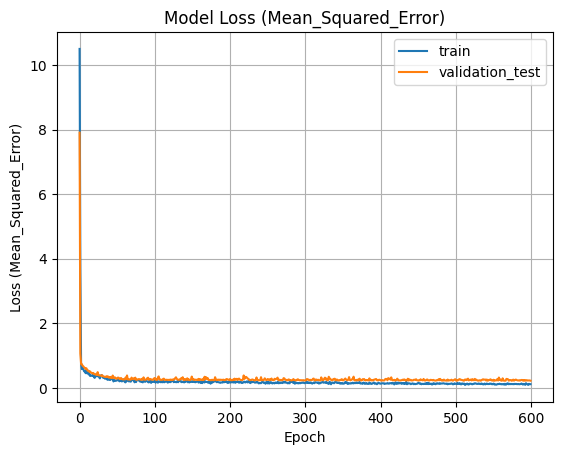

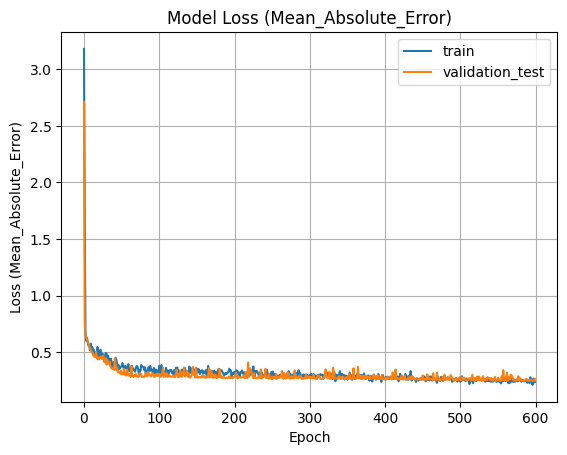

In [ ]:
#For mean squared error vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Squared_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Squared_Error)')
plt.show()

#For mean absolute error vs epoch
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['train' , 'validation_test'])
plt.grid(True)
plt.title('Model Loss (Mean_Absolute_Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean_Absolute_Error)')
plt.show()

In [ ]:
predictions_on_trained_data = ann.predict(x=train_x, batch_size=10)

18/18 [==============================] - 0s 2ms/step


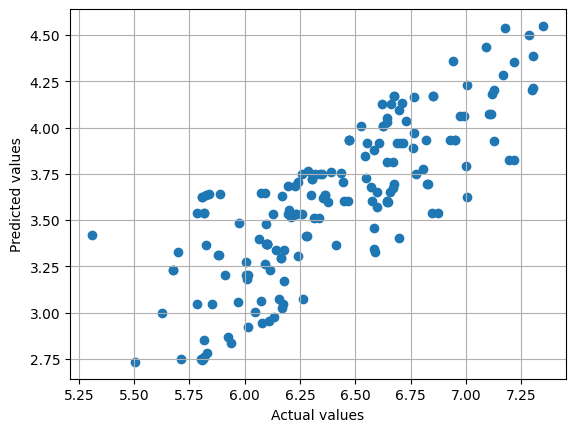

In [ ]:
plt.scatter(train_y, predictions_on_trained_data)
#plt.plot([2.5, 3.5, 4.5, 6,10], [2.5, 3.5, 4.5, 6,10], 'r') # y=x line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

In [ ]:
predictions = ann.predict(x=test_x, batch_size=10)

5/5 [==============================] - 0s 3ms/step


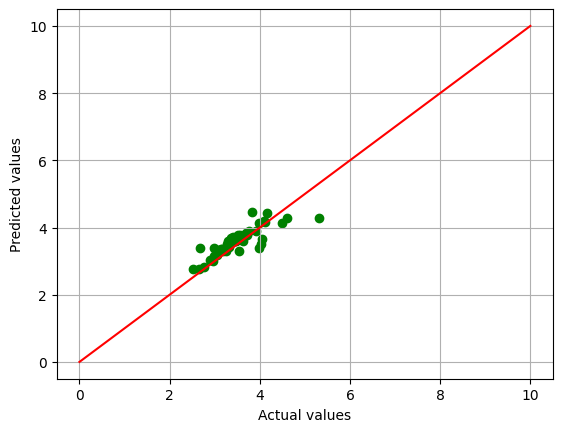

In [ ]:
plt.scatter(test_y4, predictions,color='green')
plt.plot([0,2.5, 3.5, 4.5, 6,10], [0,2.5, 3.5, 4.5, 6,10], 'r') # y=x line

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.grid()
plt.show()

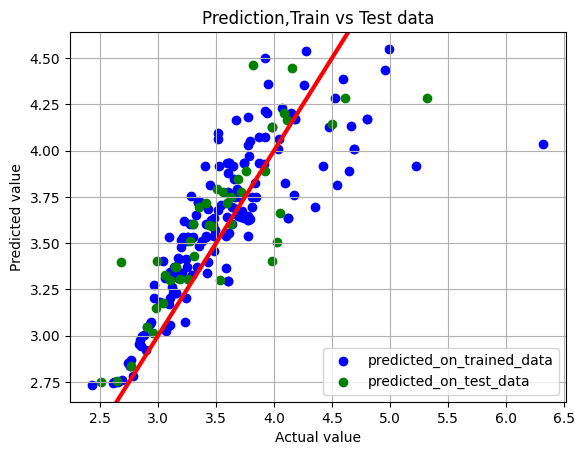

R squared value on trained data is 0.636488802472059
R squared value on   test  data is 0.6795688773721071


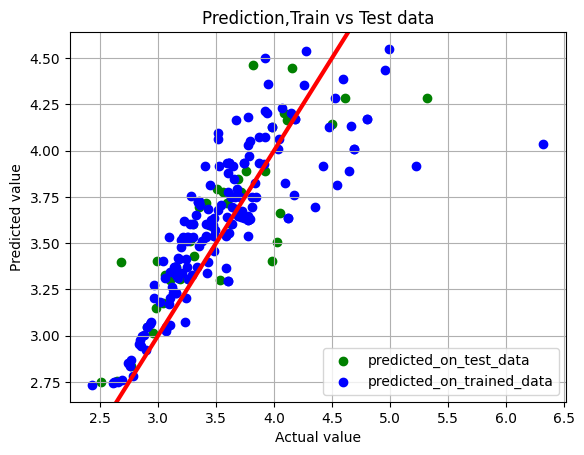

In [ ]:
#Highlighting predictions on test data(green dots)
plt.scatter(train_y4, predictions_on_trained_data, color='b')
plt.scatter(test_y4, predictions, color='g')
plt.legend(['predicted_on_trained_data' , 'predicted_on_test_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()

#R_Squared Values
r_squared = r2_score(train_y4, predictions_on_trained_data)
print('R squared value on trained data is', r_squared)
r_squared = r2_score(test_y4, predictions)
print('R squared value on   test  data is', r_squared)


#Highlighting predictions on trained data(blue dots)
plt.scatter(test_y4, predictions, color='g')
plt.scatter(train_y4, predictions_on_trained_data, color='b')
plt.legend(['predicted_on_test_data' , 'predicted_on_trained_data'])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='red', lw=3, scalex=False, scaley=False)
plt.title('Prediction,Train vs Test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.show()